In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metric
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn import preprocessing

In [53]:
welding = pd.read_excel('welding_dataset.xlsx', index_col = 'idx')
welding_copy = welding.copy()
welding_copy.head()
# welding_copy.info()

,Machine_Name,Item No,working time,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
idx,,,,,,,,,
1,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.33,14.57,2.701,72.0
2,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.57,2.701,72.0
3,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,71.0
4,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,72.0
5,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.56,2.704,72.0


In [12]:
# 데이터 종류 및 개수 확인

In [10]:
for feature in welding_copy:
    print(feature,welding_copy[feature].value_counts())

Machine_Name Spot-01    11939
Name: Machine_Name, dtype: int64
Item No 65235-25800    11939
Name: Item No, dtype: int64
working time 2020-04-02    2000
2020-03-31    1800
2020-03-27    1648
2020-03-30    1470
2020-03-25    1352
2020-03-24    1200
2020-03-26    1000
2020-04-03     800
2020-04-07     669
Name: working time, dtype: int64
Thickness 1(mm) 0.7    11939
Name: Thickness 1(mm), dtype: int64
Thickness 2(mm) 0.7    11939
Name: Thickness 2(mm), dtype: int64
weld force(bar) 2.31    1237
2.33    1062
2.35    1047
2.32    1036
2.36    1030
        ... 
3.74       4
7.87       4
2.23       2
2.19       2
2.36       2
Name: weld force(bar), Length: 177, dtype: int64
weld current(kA) 14.73    1284
14.74    1276
14.75    1002
14.72     771
14.59     630
14.76     612
14.71     553
14.58     544
14.60     431
14.57     378
14.77     350
14.78     318
14.70     312
14.56     296
14.55     278
14.61     260
14.80     216
14.81     204
14.83     192
14.62     154
14.85     144
14.67     142


In [13]:
#wedling제품 요약 통계량

In [102]:
welding_copy.describe()

,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
count,1.193900e+04,1.193900e+04,11939.000000,11939.000000,11939.000000,11939.000000
mean,7.000000e-01,7.000000e-01,2.787925,14.711208,2.704223,71.724123
std,1.113600e-13,1.113600e-13,1.455966,0.099000,0.024700,0.632049
min,7.000000e-01,7.000000e-01,1.740000,14.520000,2.464000,70.000000
25%,7.000000e-01,7.000000e-01,2.310000,14.610000,2.699000,71.000000
50%,7.000000e-01,7.000000e-01,2.340000,14.730000,2.702000,72.000000
75%,7.000000e-01,7.000000e-01,2.370000,14.750000,2.706000,72.000000
max,7.000000e-01,7.000000e-01,10.540000,15.070000,2.861000,73.000000


In [83]:
corr = welding_copy.corr(method = 'kendall')
corr = corr.fillna(0)
corr

C:\Users\woni7\AppData\Local\Temp\ipykernel_18212\2557199629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = welding_copy.corr(method = 'kendall')


,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
Thickness 1(mm),1.0,0.0,0.000000,0.000000,0.000000,0.000000
Thickness 2(mm),0.0,1.0,0.000000,0.000000,0.000000,0.000000
weld force(bar),0.0,0.0,1.000000,-0.207660,0.143607,0.049078
weld current(kA),0.0,0.0,-0.207660,1.000000,0.033428,-0.034601
weld Voltage(v),0.0,0.0,0.143607,0.033428,1.000000,-0.013372
weld time(ms),0.0,0.0,0.049078,-0.034601,-0.013372,1.000000


<Axes: >

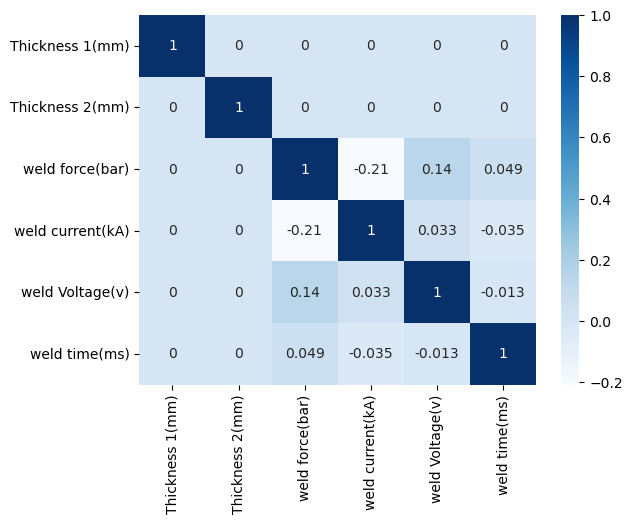

In [88]:
#변수 간의 상관계수 시각화
sns.heatmap(corr,annot = True, cmap = 'Blues')


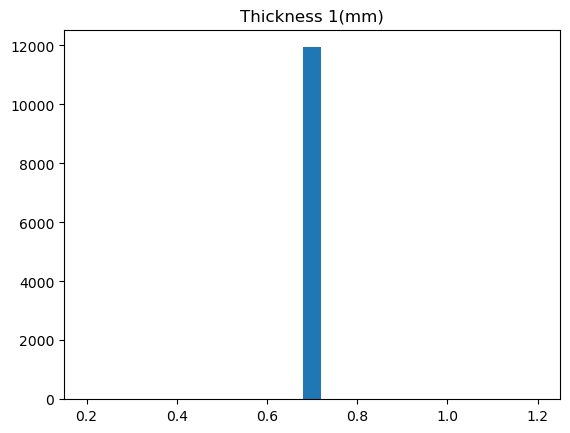

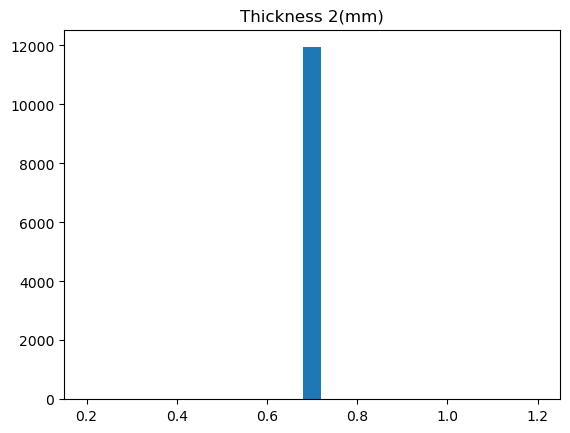

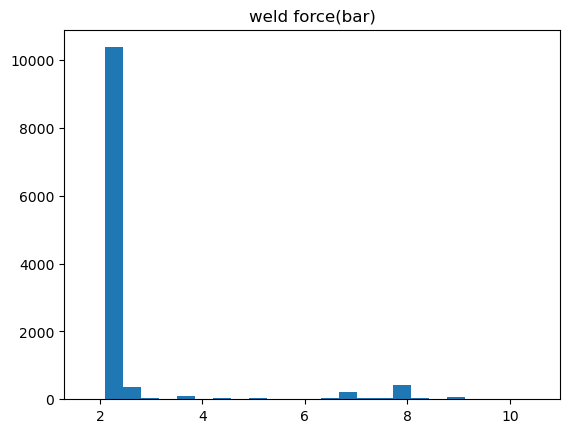

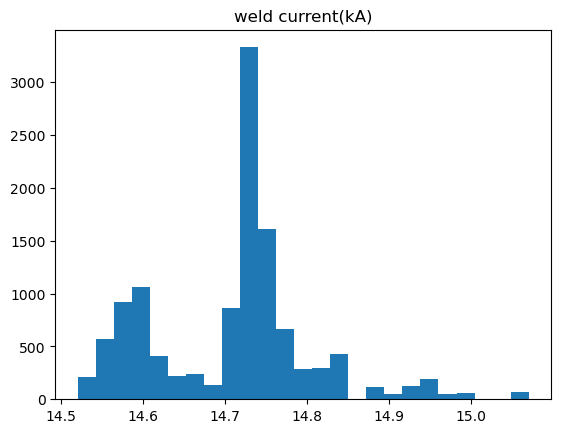

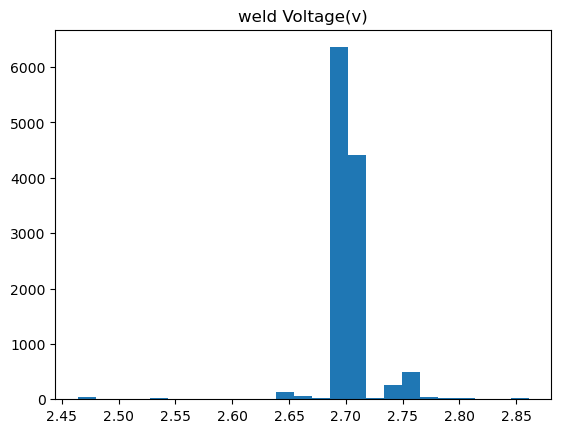

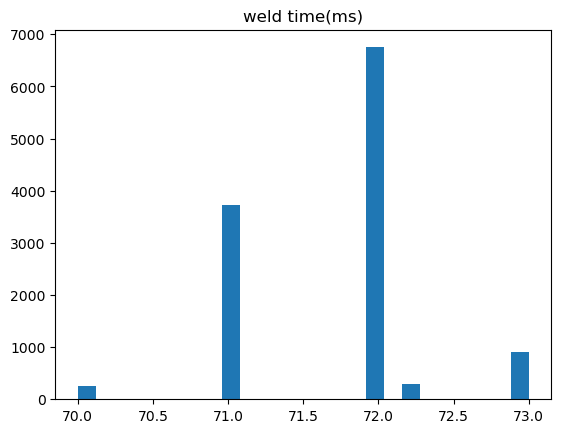

In [115]:
for index, value in enumerate(corr.columns):
    plt.figure(index)
    plt.hist(welding_copy[value],bins = 25)
    plt.title(value)